# 3. RGB Galaxy

Cythonization is one of stable acceleration process.

In this notebook, we are trying to accelerate python program with cython.

<copyright>
Copyright ©︎ , 2020 吉延石油株式会社, All rights reserved.
</copyright>
<reference url1="https://stackoverflow.com/questions/48721567/how-can-i-make-this-image-processing-function-faster-already-tried-cython"/>


In [ ]:
!git clone https://github.com/yoshinobu-sekiyu/Gas-station-nationality-classification.git

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt

In [ ]:
%load_ext Cython

In [ ]:
%%cython

# All codes are cited from reference.
cimport cython
from libc.stdint cimport uint8_t
import numpy as np
cimport numpy as np

cdef packed struct ColorData:
    np.uint16_t min_x, max_x, min_y, max_y
    np.uint32_t count

@cython.wraparound(False)
@cython.boundscheck(False)
cpdef get_histogram(np.uint8_t[:, :, :] img):
    cdef int y_lim = img.shape[0]
    cdef int x_lim = img.shape[1]
    cdef int y, x
    cdef uint8_t r, g, b

    """
    #You can define a numpy structured array dtype by hand using tuples...
    cdef np.dtype color_dtype = np.dtype([
        ("min_x", np.uint16),
        ("max_x", np.uint16),
        ("min_y", np.uint16),
        ("max_y", np.uint16),
        ("count", np.uint32)])
    """

    """
    Or, instead of rewriting the struct's definition as a numpy dtype, you can use this generic approach:
    1- making a temp object
    2- getting its pointer
    3- converting to memoryview
    4- converting to numpy array
    5- then getting that numpy array's dtype
    """
    cdef ColorData _color
    cdef np.dtype color_dtype = np.asarray(<ColorData[:1]>(&_color)).dtype


    #cdef ColorData[:, :, :] out#this alternatively works
    cdef np.ndarray[ColorData, ndim=3] out
    out = np.zeros(shape=(256, 256, 256), dtype=color_dtype)

    for y in range(y_lim):
        for x in range(x_lim):
            r = img[y, x, 0]
            g = img[y, x, 1]
            b = img[y, x, 2]
            if r >= 10 or g >= 10 or b >= 10:
                if out[r, g, b].count == 0:
                    out[r, g, b] = [x, x, y, y, 1]
                    """
                    out[r, g, b].min_x = x
                    out[r, g, b].max_x = x
                    out[r, g, b].min_y = y
                    out[r, g, b].max_y = y
                    out[r, g, b].count = 1
                    """
                else:
                    if out[r, g, b].min_x >= x:
                        out[r, g, b].min_x = x
                    if out[r, g, b].max_x <= x:
                        out[r, g, b].max_x = x
                    if out[r, g, b].min_y >= y:
                        out[r, g, b].min_y = y
                    if out[r, g, b].max_y <= y:
                        out[r, g, b].max_y = y
                    out[r, g, b].count += 1
    return out

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


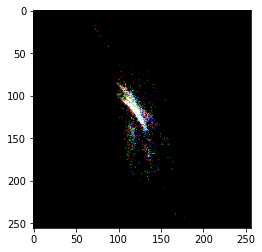

In [5]:
# Using simple function defined in cython.

im = "../datasets/_image/0.png"

img = imread(im)

plt.imshow(get_histogram(img)["max_x"][:,:,120:123])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

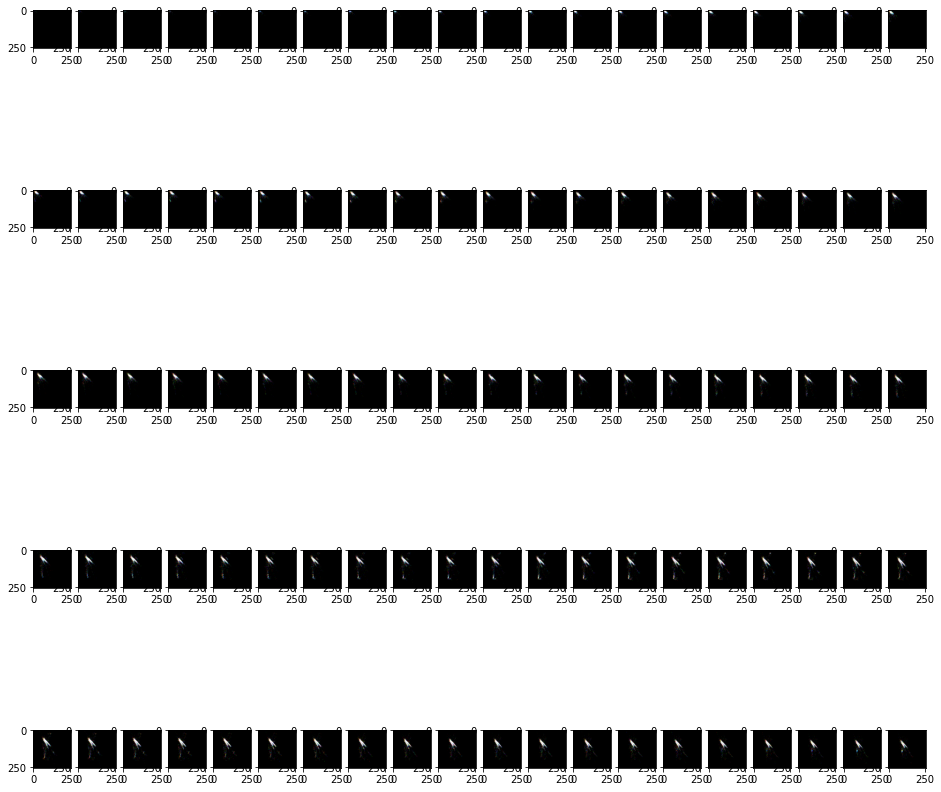

In [6]:
# Vizualizing RGB-galaxy.

fig=plt.figure(figsize=(16, 16))
columns = 20
rows = 5
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(get_histogram(img)["max_x"][:,:,i:i + 3])
plt.show()